# Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.options.display.float_format = '{:,.2f}'.format
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [2]:
orders_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
payment_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
customers_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')

# Data Cleaning

Check null and duplicate values

In [3]:
orders_df.duplicated().sum()

0

In [4]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [5]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
customers_df.duplicated().sum()

0

In [7]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [8]:
payment_df.duplicated().sum()

0

In [9]:
# Drop null values
orders_df = orders_df.dropna()
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Change Data Types

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [11]:
#Change date columns into datetime, from strings
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for i in date_cols:
  orders_df[i] = pd.to_datetime(orders_df[i])
  
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


# Merge Datasets

In [12]:
order_customer = orders_df.merge(customers_df, on = 'customer_id')
order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [13]:
df_full = order_customer.merge(payment_df, on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_status                   100739 non-null  object        
 3   order_purchase_timestamp       100739 non-null  datetime64[ns]
 4   order_approved_at              100739 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 6   order_delivered_customer_date  100739 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 8   customer_unique_id             100739 non-null  object        
 9   customer_zip_code_prefix       100739 non-null  int64         
 10  customer_city                  100739 non-null  object        
 11  

Check Order Status

In [15]:
df_full['order_status'].value_counts()

delivered    100733
canceled          6
Name: order_status, dtype: int64

In [16]:
#Removing cancelled orders
df_full = df_full[df_full['order_status'] == 'delivered']
df_full['order_status'].value_counts()

delivered    100733
Name: order_status, dtype: int64

**Removing Some Columns**
> Columns that are not going to be used for the analysis later will be removed

In [17]:
#List of all columns name
column_name = df_full.columns
column_name

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [18]:
#Dropping columns
df_full = df_full.drop(['order_status','order_purchase_timestamp'], axis = 1)
df_full = df_full.drop(column_name[5:10], axis = 1)
df_full

,order_id,customer_id,order_approved_at,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,vianopolis,GO,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...
100734,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,sao jose dos campos,SP,1,credit_card,3,85.08
100735,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,praia grande,SP,1,credit_card,3,195.00
100736,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,nova vicosa,BA,1,credit_card,5,271.01
100737,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,japuiba,RJ,1,credit_card,4,441.16


In [19]:
len(df_full['customer_state'].unique())

27

# **Checking Outliers**

In [20]:
df_full['payment_value'].describe()

count   100,733.00
mean        153.07
std         214.47
min           0.00
25%          56.78
50%         100.00
75%         171.29
max      13,664.08
Name: payment_value, dtype: float64

In [21]:
Q1 = df_full['payment_value'].quantile(0.25)
Q3 = df_full['payment_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
out_list = df_full.index[(df_full['payment_value'] < lower_bound) | (df_full['payment_value'] > upper_bound)]
out_list = sorted(set(out_list))
print('There are ' + str(len(out_list)) + ' outliers')
print('Now lets see if we need to remove it or not')

There are 7695 outliers
Now lets see if we need to remove it or not


**The analysis that I'm looking for are:**
*  Number of monthly order (count)
*  Daily order trend (count)
*  Orders per payment type (count)

**Considering that, the value of payment will not affect the results. The outliers will be kept for this reason. However, later on clustering analysis outliers might need to be removed**

# Data Visualization

In [22]:
order_monthly = df_full[['order_approved_at']].groupby(df_full['order_approved_at'].dt.to_period('M')).agg({'order_approved_at':'count'})
order_monthly.head()

,order_approved_at
order_approved_at,
2016-10,282
2016-12,1
2017-01,763
2017-02,1735
2017-03,2708


In [23]:
#Change the column name to num_of_orders
order_monthly = order_monthly.rename(columns = {'order_approved_at': 'num_of_orders'})
#Changing order_approved_at to column, not an index
order_monthly = order_monthly.reset_index()

#adding column for month name and year 
order_monthly['month_year'] = order_monthly['order_approved_at'].dt.strftime('%b-%Y')
order_monthly.head()

,order_approved_at,num_of_orders,month_year
0,2016-10,282,Oct-2016
1,2016-12,1,Dec-2016
2,2017-01,763,Jan-2017
3,2017-02,1735,Feb-2017
4,2017-03,2708,Mar-2017


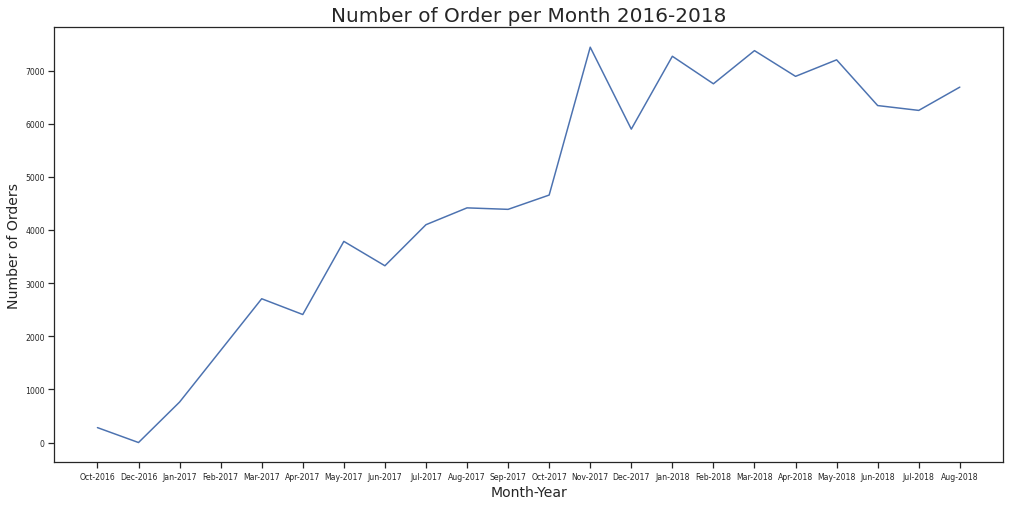

In [24]:
plt.figure(figsize=(17,8))
sns.set_theme(style="ticks", font_scale=0.7)
order_monthly_viz = sns.lineplot(x = 'month_year', y = 'num_of_orders', data = order_monthly)
order_monthly_viz.set_title('Number of Order per Month 2016-2018',fontsize = 20)
order_monthly_viz.set_xlabel('Month-Year',fontsize = 14)
order_monthly_viz.set_ylabel('Number of Orders',fontsize = 14)
plt.show()

**Function to visualize monthly order per year**

In [25]:
def call_monthly_order (df,year):
  df_year = df[df['order_approved_at'].dt.year == year]
  df_year = df_year[['month_year','num_of_orders']]
  sns.set(rc = {'figure.figsize':(10,4)})
  sns.set_theme(style="ticks", font_scale=0.8)
  visualize = sns.lineplot(x = 'month_year', y = 'num_of_orders', data = df_year)
  visualize.set_title('Number of Order per Month in '+ str(year), fontsize = 17)
  visualize.set_xlabel('Month',fontsize = 13)
  visualize.set_ylabel('Number of Orders', fontsize = 13)
  return visualize

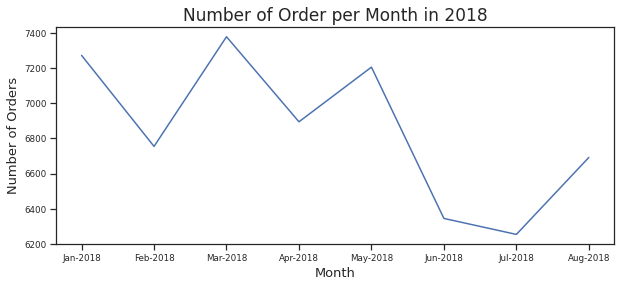

In [26]:
orders_2018 = call_monthly_order(order_monthly,2018)

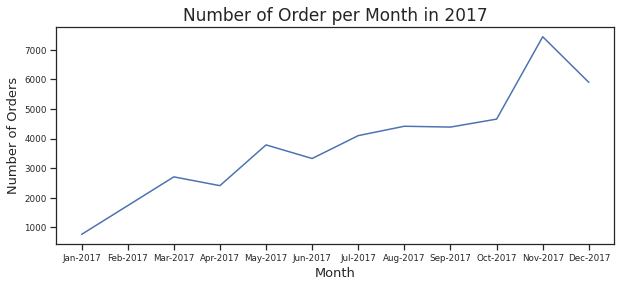

In [27]:
orders_2017 = call_monthly_order(order_monthly,2017)

**Daily Orders Trend**



In [28]:
order_daily = df_full[['order_approved_at']].groupby(df_full['order_approved_at'].dt.dayofweek.sort_index()).count()
order_daily

,order_approved_at
order_approved_at,
0,13294
1,19341
2,16040
3,15677
4,14885
5,12354
6,9142


In [29]:
daily_trend_index = order_daily.rename(columns = {'order_approved_at': 'num_of_orders'})
daily_trend = daily_trend_index.reset_index()
daily_trend

,order_approved_at,num_of_orders
0,0,13294
1,1,19341
2,2,16040
3,3,15677
4,4,14885
5,5,12354
6,6,9142


In [30]:
dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in range(7):
  daily_trend['order_approved_at'] = daily_trend['order_approved_at'].replace(i,dow[i])
daily_trend

,order_approved_at,num_of_orders
0,Monday,13294
1,Tuesday,19341
2,Wednesday,16040
3,Thursday,15677
4,Friday,14885
5,Saturday,12354
6,Sunday,9142


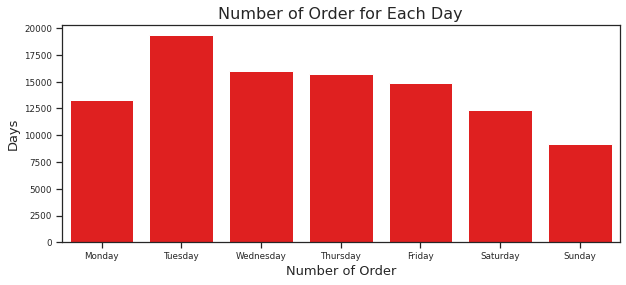

In [31]:
daily_trend_viz = sns.barplot(x='order_approved_at', y='num_of_orders', data=daily_trend, color = 'red')
daily_trend_viz.set_xlabel('Number of Order',fontsize = 13)
daily_trend_viz.set_ylabel('Days', fontsize = 13)
plt.title('Number of Order for Each Day',fontsize = 16)
plt.show()

**Percentage Order per Payment Type**


In [32]:
payment_count_index = df_full[['payment_type']].groupby(df_full['payment_type']).count()
payment_count_index = payment_count_index.rename(columns = {'payment_type':'num_of_payment'})
payment_count = payment_count_index.reset_index()
payment_count

,payment_type,num_of_payment
0,boleto,19177
1,credit_card,74578
2,debit_card,1485
3,voucher,5493


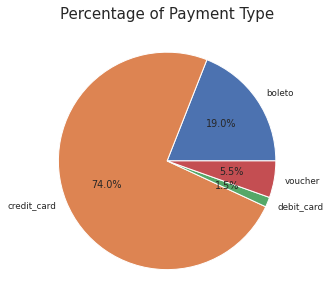

In [33]:
label = payment_count['payment_type']
plt.figure(figsize = (6,5))
plt.title('Percentage of Payment Type', fontsize = 15)
plt.pie(payment_count['num_of_payment'], labels = label,autopct = '%0.1f%%')
plt.show()

# **Insights**


---


1.   The number of sales grew significantly in 2017
2.   On June 2018 the sales dropped
3.   Customers makes the most order on Tuesday, while Sunday is the least favourite
4. Credit card is the most preferrable payment type, while the usage of debit card is the lowest (only 1% out of 100k+ orders)

# Customer Segmentation

In [34]:
df_clean = df_full.drop(out_list, axis = 0)
df_clean.head()

,order_id,customer_id,order_approved_at,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,vianopolis,GO,1,credit_card,3,179.12


# Creating RFM Score

**R = Recency**
> Days since the last purchase

In [35]:
max_date = df_clean.groupby('customer_id')['order_approved_at'].max().reset_index()
max_date = max_date.rename({'order_approved_at':'most_recent'},axis = 1)
max_date.head()

,customer_id,most_recent
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19


In [36]:
max_date['r_score'] = (max_date['most_recent'].max() - max_date['most_recent']).dt.days
max_date.head()

,customer_id,most_recent,r_score
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147


**F = Frequency**
> How many times the customer makes transaction

In [37]:
n_transaction = df_clean.groupby('customer_id')['order_id'].count().reset_index()
n_transaction = n_transaction.rename({'order_id':'f_score'},axis = 1)
n_transaction.head()

,customer_id,f_score
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


**M = Monetary**
> Average Purchase Value form the customer

In [38]:
avg_purchase = df_clean.groupby('customer_id')['payment_value'].mean().reset_index()
avg_purchase = avg_purchase.rename({'payment_value':'m_score'},axis = 1)
avg_purchase.head()

,customer_id,m_score
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


In [39]:
avg_purchase['customer_id'].nunique()

88893

There are 88893 unique customer

In [40]:
merge = max_date.merge(n_transaction, how = 'left', on = 'customer_id')
merge = merge.merge(avg_purchase, how = 'left', on = 'customer_id')
merge

,customer_id,most_recent,r_score,f_score,m_score
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147,1,107.01
...,...,...,...,...,...
88888,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 01:35:21,165,1,91.91
88889,fffecc9f79fd8c764f843e9951b11341,2018-03-29 17:10:27,152,3,27.12
88890,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:54:37,99,1,63.13
88891,ffff42319e9b2d713724ae527742af25,2018-06-13 17:20:23,76,1,214.13


In [41]:
df_rfm = merge[['customer_id','r_score','f_score','m_score']]
df_rfm

,customer_id,r_score,f_score,m_score
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,377,1,179.35
4,000379cdec625522490c315e70c7a9fb,147,1,107.01
...,...,...,...,...
88888,fffcb937e9dd47a13f05ecb8290f4d3e,165,1,91.91
88889,fffecc9f79fd8c764f843e9951b11341,152,3,27.12
88890,fffeda5b6d849fbd39689bb92087f431,99,1,63.13
88891,ffff42319e9b2d713724ae527742af25,76,1,214.13


# Using K-Means to Cluster

In [42]:
features = df_rfm.drop('customer_id',axis = 1)
scale = StandardScaler()
features_scaled = scale.fit_transform(features)
features_scaled

array([[ 0.31745045, -0.12196184,  0.02632091],
       [ 1.11724458, -0.12196184, -0.63555658],
       [ 2.02192974, -0.12196184,  1.15457521],
       ...,
       [-0.91501919, -0.12196184, -0.69540944],
       [-1.06580005, -0.12196184,  1.41622169],
       [ 0.80257148, -0.12196184, -0.94195286]])

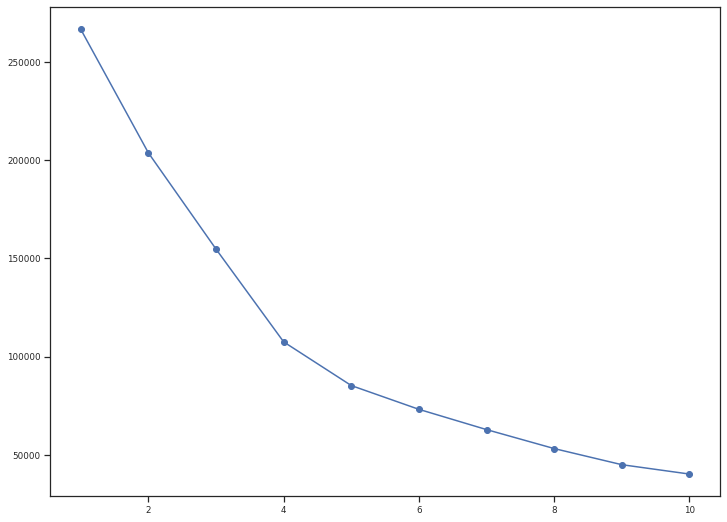

In [43]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=  i,init = 'k-means++', random_state = 1)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12,9))
plt.plot(range(1,11),wcss, marker = 'o')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state = 1)
kmeans.fit(features_scaled)
df_seg_kmeans = df_rfm.copy()
df_seg_kmeans['segments'] = kmeans.labels_
df_seg_kmeans.head()

,customer_id,r_score,f_score,m_score,segments
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2
1,000161a058600d5901f007fab4c27140,409,1,67.41,2
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,2
3,0002414f95344307404f0ace7a26f1d5,377,1,179.35,0
4,000379cdec625522490c315e70c7a9fb,147,1,107.01,1


In [45]:
df_analysis = df_seg_kmeans.groupby('segments').mean()
df_analysis

,r_score,f_score,m_score
segments,,,
0,216.50,1.00,219.26
1,128.21,1.04,79.49
2,399.23,1.04,85.18
3,278.27,6.14,25.12


In [46]:
df_analysis['#observations'] = df_seg_kmeans[['segments','f_score']].groupby(['segments']).count()
df_analysis['Percentage'] = df_analysis['#observations'] / df_analysis['#observations'].sum()
df_analysis


,r_score,f_score,m_score,#observations,Percentage
segments,,,,,
0,216.50,1.00,219.26,20125,0.23
1,128.21,1.04,79.49,39005,0.44
2,399.23,1.04,85.18,29496,0.33
3,278.27,6.14,25.12,267,0.00


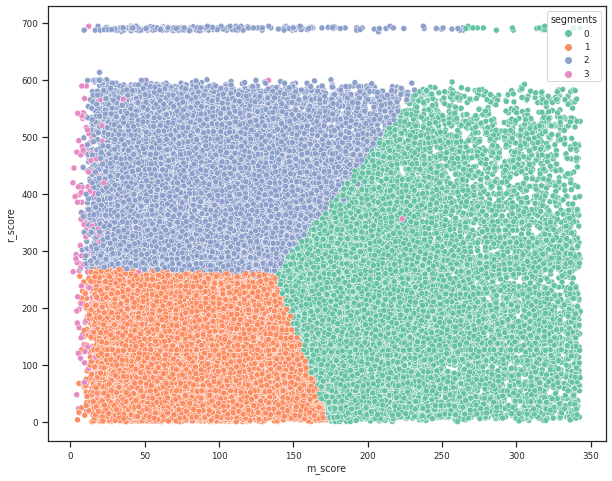

In [47]:
x_axis = df_seg_kmeans['m_score']
y_axis = df_seg_kmeans['r_score']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_seg_kmeans['segments'],
                palette = 'Set2', legend = 'full')
plt.show()


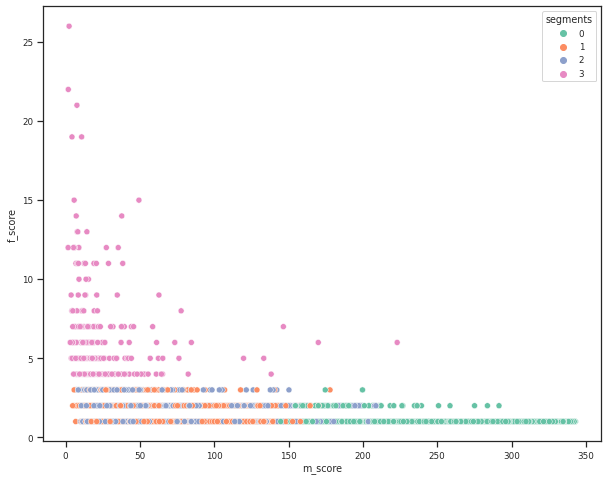

In [48]:
x_axis = df_seg_kmeans['m_score']
y_axis = df_seg_kmeans['f_score']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_seg_kmeans['segments'],
                palette = 'Set2', legend = 'full')
plt.show()


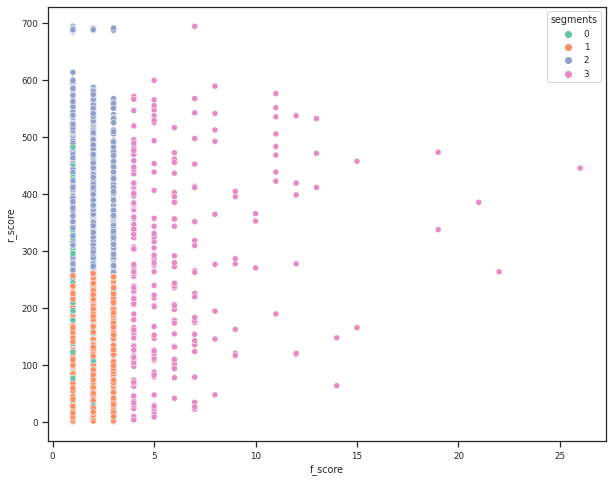

In [49]:
x_axis = df_seg_kmeans['f_score']
y_axis = df_seg_kmeans['r_score']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_seg_kmeans['segments'],
                palette = 'Set2', legend = 'full')
plt.show()


In [50]:
df_analysis

,r_score,f_score,m_score,#observations,Percentage
segments,,,,,
0,216.50,1.00,219.26,20125,0.23
1,128.21,1.04,79.49,39005,0.44
2,399.23,1.04,85.18,29496,0.33
3,278.27,6.14,25.12,267,0.00


# Intepretations:
* Segment 0  = Customers with high monetary value
* Segment 1 = Customers that did transaction recently
* Segment 2 = Customers that has not been doing transaction for the longest time
* Segment 3 = Customer that did multiple transactions on the site, but only a small number of people are in this segment (less than 1%)